###  图像处理的python库  ： openCV  matplotlib   tensorflow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# 打印numpy的数组对象时中间不省略
np.set_printoptions(threshold=np.inf)

In [3]:
def show_image_tensor(image_tensor):
    #使用交互式会话
    #获取图像参数对象对应的image图像，image对象有一个【h,w,c】
    image = image_tensor.eval()
    print('图像的大小为：{}'.format(image.shape))
    if len(image.shape)==2 or image.shape[2]==1:
        # 黑白图片
        plt.imshow(image[:,:,0],cmap='Greys_r')
        plt.show()
    elif len(image.shape)==3:
        # 彩色
        plt.imshow(image)
        plt.show()

In [4]:
#交互式会话
sess = tf.InteractiveSession()

In [5]:
image_path = './image/xiaoren.png'
image_path = './image/gray.png'
image_path = './image/black_white.jpg'

图像的大小为：(300, 302, 3)


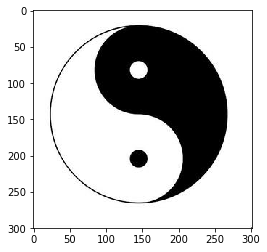

In [6]:
# 1.图像的格式转换
# 读取数据
file_contents = tf.read_file(image_path)
# 将图像数据转换为像素点的数据格式，返回对象为: [height, width, num_channels], 如果是gif的图像返回[num_frames, height, width, num_channels]
# height: 图片的高度的像素大小
# width: 图片的水平宽度的像素大小
# num_channels: 图像的通道数，也就是API中的channels的值
# num_frames: 因为gif的图像是一个动态图像，可以将每一个动的画面看成一个静态图像，num_frames相当于在这个gif图像中有多少个静态图像
# 参数channels：可选值：0 1 3 4，默认为0， 一般使用0 1 3，不建议使用4
# 0：使用图像的默认通道，也就是图像是几通道的就使用几通道
# 1：使用灰度级别的图像数据作为返回值（只有一个通道：黑白）
# 3：使用RGB三通道读取数据
# 4：使用RGBA四通道读取数据(R：红色，G：绿色，B：蓝色，A：透明度)
# print(file_contents.eval())
image_tensor = tf.image.decode_jpeg(file_contents,channels=3)
show_image_tensor(image_tensor)

图像的大小为：(600, 510, 3)


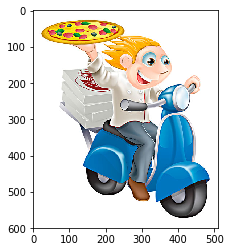

In [7]:
image_path = './image/xiaoren.png'
file_contents2 = tf.read_file(image_path)
image_tensor2 = tf.image.decode_image(file_contents2,channels=3)
show_image_tensor(image_tensor2)

图像的大小为：(768, 1024, 1)


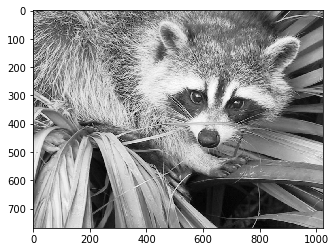

In [8]:
image_path = './image/gray.png'
file_contents3 = tf.read_file(image_path)
image_tensor3 = tf.image.decode_png(file_contents3,channels=0)
show_image_tensor(image_tensor3)

### 图像大小重置

图像的大小为：(200, 200, 3)


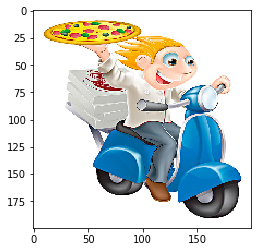

In [9]:
"""
BILINEAR = 0 线性插值，默认
NEAREST_NEIGHBOR = 1 最近邻插值，失真最小
BICUBIC = 2 三次插值
AREA = 3 面积插值
"""
# images: 给定需要进行大小转换的图像对应的tensor对象，格式为：[height, width, num_channels]或者[batch, height, width, num_channels]
# API返回值和images格式一样，唯一区别是height和width变化为给定的值
resize_image = tf.image.resize_images(images=tf.image.decode_jpeg(tf.read_file('./image/xiaoren.png'),channels=3),
                                     size=(200,200),
                                     method = tf.image.ResizeMethod.NEAREST_NEIGHBOR
                                    )
show_image_tensor(resize_image)

图像的大小为：(3000, 3000, 3)


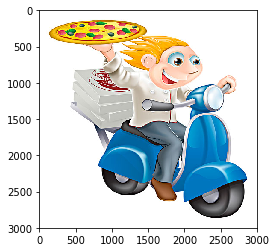

In [10]:
resize_image2 = tf.image.resize_images(images=tf.image.decode_jpeg(tf.read_file('./image/xiaoren.png'),channels=3),size=(3000,3000),method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
show_image_tensor(resize_image2)

### 图片剪切
#### 图片重置大小  通过剪切或者填充
tf.image.resize_image_with_crop_or_pad：剪裁或填充处理，会根据原图像的尺寸和指定的目标图像的尺寸选择剪裁还是填充，如果原图像尺寸大于目标图像尺寸，则在中心位置剪裁，反之则用黑色像素填充。 

图像的大小为：(800, 800, 3)


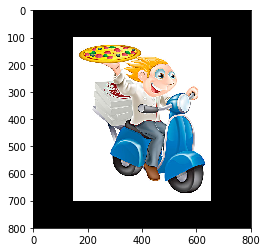

In [23]:
image1 = tf.read_file('./image/xiaoren.png')
image_tensor = tf.image.decode_png(image1,channels=3)
crop_or_pad_image_tensor = tf.image.resize_image_with_crop_or_pad(image=image_tensor,target_height=800,target_width=800)
show_image_tensor(crop_or_pad_image_tensor)

#### tf.image.central_crop：比例调整，central_fraction决定了要指定的比例，取值范围为(0，1]，该函数会以中心点作为基准，选择整幅图中的指定比例的图像作为新的图像。

图像的大小为：(540, 460, 3)


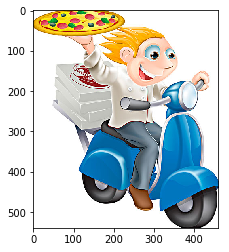

In [29]:
image2 = tf.read_file('./image/xiaoren.png')
image2_tensor = tf.image.decode_png(image2,channels=3)
central_crop_tensor = tf.image.central_crop(image=image2_tensor,central_fraction=0.9)
show_image_tensor(central_crop_tensor)

### 填充数据（给定位置填充）
从上到下  从左到右

图像的大小为：(1000, 1000, 3)


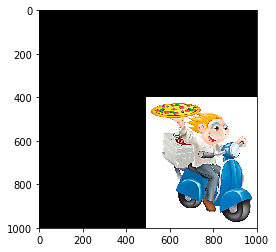

In [34]:
image5 = tf.read_file('./image/xiaoren.png')
image5_tensor = tf.image.decode_png(image5,channels=3)
pad_to_bounding_box_image_tensor = tf.image.pad_to_bounding_box(image=image5_tensor
                ,offset_height=400,offset_width=490,target_height=1000,target_width=1000)
show_image_tensor(pad_to_bounding_box_image_tensor)

图像的大小为：(600, 510, 3)


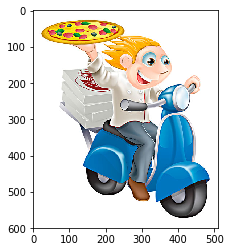

In [35]:
show_image_tensor(image5_tensor)

#### 图像的剪切  是从下标开始    注意 target的大小不要超过本身的大小
target_width+offset_width< width

图像的大小为：(300, 300, 3)


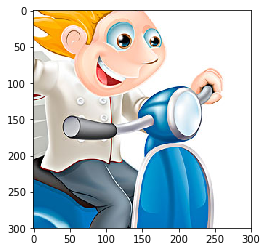

In [39]:
#### 剪切数据  给定位置 开始剪切

crop_to_bounding_box_tensor =  tf.image.crop_to_bounding_box(image=image5_tensor,offset_height=100,offset_width=200,
                              target_height=300,target_width=300)
show_image_tensor(crop_to_bounding_box_tensor)

### 图片旋转
#### 上下旋转

图像的大小为：(600, 510, 3)


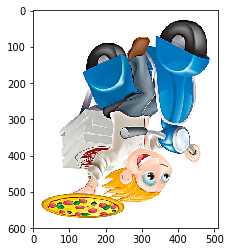

In [40]:
flip_up_down_image = tf.image.flip_up_down(image=image5_tensor)
show_image_tensor(flip_up_down_image)

#### 左右旋转

图像的大小为：(600, 510, 3)


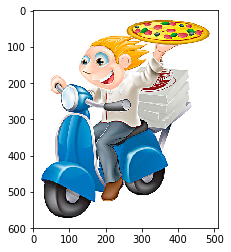

In [42]:
flip_left_right_tensor = tf.image.flip_left_right(image=image5_tensor)
show_image_tensor(flip_left_right_tensor)

#### 上下左右都旋转

图像的大小为：(600, 510, 3)


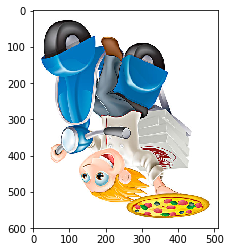

In [43]:
flip_left_right_tensor = tf.image.flip_left_right(image=flip_up_down_image)
show_image_tensor(flip_left_right_tensor)

In [45]:
#### 对角线翻转 转置

图像的大小为：(510, 600, 3)


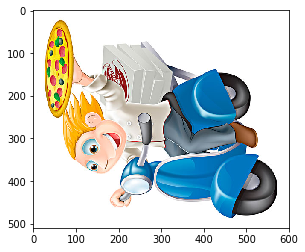

In [46]:
transpose_image_tensor = tf.image.transpose_image(image5_tensor)
show_image_tensor(transpose_image_tensor)

#### 旋转    90°  180°  270°   k= 1，2，3，4

图像的大小为：(600, 510, 3)


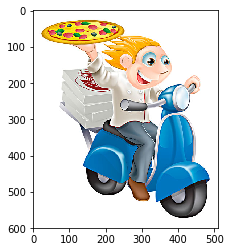

In [51]:
k_rot90_image_tensor = tf.image.rot90(image=image5_tensor,k=4)
show_image_tensor(k_rot90_image_tensor)

### 图像颜色空间的转换

#### 颜色的空间转换必须将image的值转换为float32类型，不能用 uint8类型

In [65]:
float32_image_tensor = tf.image.convert_image_dtype(image=image5_tensor,dtype=tf.float32)

图像的大小为：(600, 510, 3)


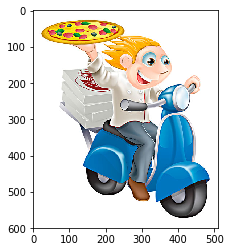

In [66]:
show_image_tensor(float32_image_tensor)

#### rgb -> hsv  ( h  图像的色彩,s: 图像的饱和度，v ： 图像的亮度)

图像的大小为：(600, 510, 3)


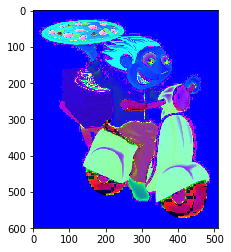

In [67]:
hsv_image = tf.image.rgb_to_hsv(float32_image_tensor)
show_image_tensor(hsv_image)

#### hsv->rgb

图像的大小为：(600, 510, 3)


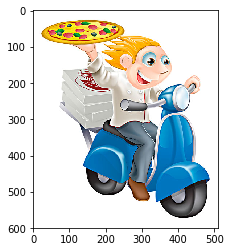

In [69]:
rgb_image = tf.image.hsv_to_rgb(hsv_image)
show_image_tensor(rgb_image)

#### rgb—> gray
##### 黑白的不可以转彩色

图像的大小为：(600, 510, 1)


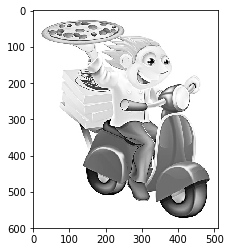

In [70]:
gray_image = tf.image.rgb_to_grayscale(rgb_image)
show_image_tensor(gray_image)

图像的大小为：(600, 510, 1)


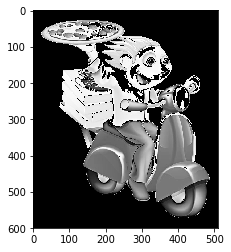

In [72]:
可以从颜色空间中提取图像的轮廓信息(图像的二值化)
a = gray_image
b = tf.less_equal(a,0.9)
# 0是黑，1是白
# condition?true:false
# condition、x、y格式必须一模一样，当condition中的值为true的之后，返回x对应位置的值，否则返回y对应位置的值
# 对于a中所有大于0.9的像素值，设置为0     大于为0 小于为 1
c = tf.where(condition=b,x=a,y=a-a)
show_image_tensor(c)

### 图像的调整

#### 亮度调整
##### image: RGB图像信息，设置为float类型和unit8类型的效果不一样，一般建议设置为float类型
##### delta: 取值范围(-1,1）之间的float类型的值，表示对于亮度的减弱或者增强的系数值
##### 底层执行：rgb -> hsv -> h,s,v*delta -> rgb

图像的大小为：(600, 510, 3)


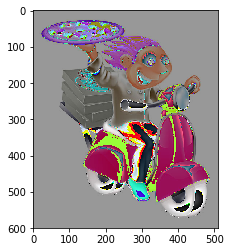

In [78]:
image6_tensor = tf.image.convert_image_dtype(image5_tensor,dtype=tf.float32)
adjust =  tf.image.adjust_brightness(image6_tensor,0.6)
show_image_tensor(adjust)

图像的大小为：(600, 510, 3)


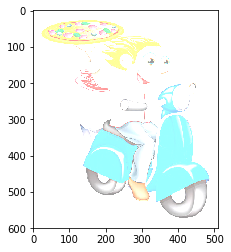

In [80]:
adjust =  tf.image.adjust_brightness(image5_tensor,0.6)
show_image_tensor(adjust)

图像的大小为：(600, 510, 3)


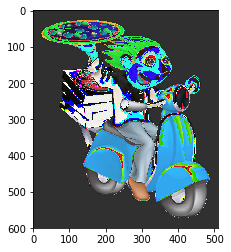

In [85]:
#### 随机亮度调整   
show_image_tensor(tf.image.random_brightness(image6_tensor,max_delta=0.5))

#### 色调调整
##### image: RGB图像信息，设置为float类型和unit8类型的效果不一样，一般建议设置为float类型
##### delta: 取值范围(-1,1）之间的float类型的值，表示对于色调的减弱或者增强的系数值
##### 底层执行：rgb -> hsv -> h*delta,s,v -> rgb

图像的大小为：(600, 510, 3)


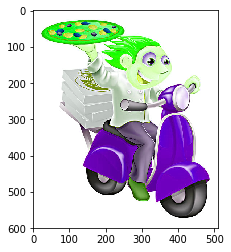

In [88]:
hue_image = tf.image.adjust_hue(image5_tensor,-0.8)
show_image_tensor(hue_image)

#### 饱和度调整
##### image: RGB图像信息，设置为float类型和unit8类型的效果不一样，一般建议设置为float类型
##### saturation_factor: 一个float类型的值，表示对于饱和度的减弱或者增强的系数值，饱和因子
##### 底层执行：rgb -> hsv -> h,s*saturation_factor,v -> rgb

图像的大小为：(600, 510, 3)


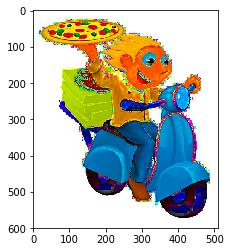

In [90]:
saturation_image = tf.image.adjust_saturation(image5_tensor,saturation_factor=500)
show_image_tensor(saturation_image)

In [91]:
#### 对比度调整  公式   （x-mean）* contrast_factor + mean

图像的大小为：(600, 510, 3)


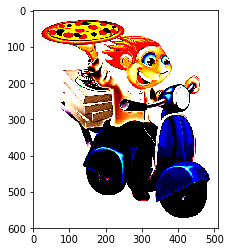

In [92]:
contrast_image = tf.image.adjust_contrast(image5_tensor,contrast_factor=10)
show_image_tensor(contrast_image)

#### 图像的gamma校正
##### images: 要求必须是float类型的数据
##### gamma：任意值，Oup = In * Gamma

图像的大小为：(600, 510, 3)


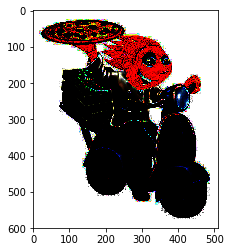

In [99]:
gamma_image = tf.image.adjust_gamma(image6_tensor,gamma=50)
show_image_tensor(gamma_image)

#### 图像的归一化
##### (x-mean)/adjusted_sttdev, adjusted_sttdev=max(stddev, 1.0/sqrt(image.NumElements()))

图像的大小为：(600, 510, 3)


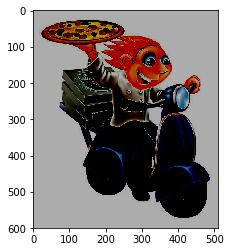

In [119]:
image7_tensor = tf.image.convert_image_dtype(image6_tensor,dtype=tf.float32)
per_image_standardization = tf.image.per_image_standardization(image=image7_tensor)
# 得做一个截断操作  将其放在0-1之间
after_img = tf.clip_by_value(per_image_standardization, 0.0, 1.0)
show_image_tensor(after_img)

### 七、噪音数据的加入

图像的大小为：(600, 510, 3)


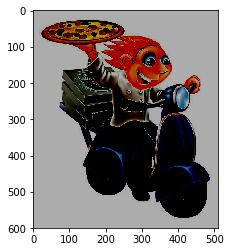

图像的大小为：(600, 510, 3)


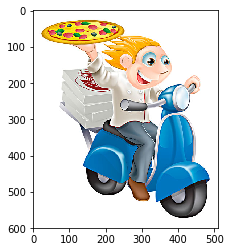

In [129]:
noisy = tf.random_normal(shape=[600,510,3],mean=0,stddev=0.1)
noisy_image_tensor = image5_tensor + tf.cast(noisy,dtype=tf.uint8)
after_img = tf.clip_by_value(per_image_standardization, 0.0, 1.0)
show_image_tensor(after_img)
show_image_tensor(image7_tensor)

图像的大小为：(600, 510, 3)


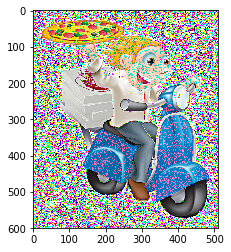

In [131]:
noisy_image1 = image2_tensor + tf.cast(20*tf.random_normal(shape=[600,510,3],mean=0,stddev=0.1),dtype=tf.uint8)
show_image_tensor(noisy_image1)

图像的大小为：(600, 510, 3)


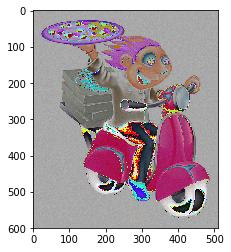

In [135]:
mioisy_image2 = image2_tensor + tf.cast(tf.random_uniform(shape=[600,510,3],minval=160,maxval=180),dtype=tf.uint8 )
show_image_tensor(mioisy_image2)